In [1]:
#Datos
import pandas as pd
import numpy as np

#Graficar
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib.patches as patches


# Generador de tablas de contingencia
from pandas import crosstab
from sklearn.metrics import mutual_info_score

#Test chi-cuadrado
from scipy.stats import chi2_contingency

#Imputación
from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer


#QQ
import statsmodels.api as sm
#Shapiro
from scipy import stats

#Escalamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

#Transformación numérica
#from sklearn.preprocessing import LabelEncoder

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import entr #Entropía

#Balanceo
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

#Advertencias
import warnings

#Separación train-test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn import neighbors
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
import graphviz
#from sklearn.tree import export_graphviz
#from sklearn.naive_bayes import CategoricalNB

#Métricas
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import calinski_harabasz_score
#from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import pairwise_distances

from datetime import datetime, time

#Otros

#import io
#import requests
#from sklearn.model_selection import RepeatedKFold
#from sklearn.inspection import permutation_importance
#from sklearn import datasets
#from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
#from sklearn.datasets import make_classification
#from scipy import special
#from scipy.stats import spearmanr
#from scipy.spatial.distance import euclidean
#from collections import defaultdict
#from yellowbrick.cluster import KElbowVisualizer
#from validclust.indices import dunn
#from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality

import os

In [2]:
#Lectura de datos desde vsc
mtdataset = pd.read_parquet('../data/processed/preprocesamiento_mtdataset.parquet')

In [3]:
mtdataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18562 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N° de factura     18562 non-null  object        
 1   Fecha de factura  18562 non-null  datetime64[ns]
 2   ID Cliente        18562 non-null  float64       
 3   País              18562 non-null  object        
 4   Cantidad          18562 non-null  int64         
 5   Monto             18562 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1015.1+ KB


In [4]:
mtdataset_num=mtdataset[['Cantidad','Monto']]

In [5]:
correlacion=mtdataset_num.corr()
correlacion

,Cantidad,Monto
Cantidad,1.000000,0.906516
Monto,0.906516,1.000000


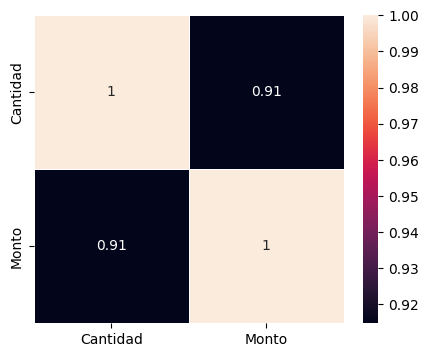

In [6]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlacion, annot=True, cmap="rocket", linewidths=.5)
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_18584\1812750294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='País', data=mtdataset_filtrado, palette='Set3', order=mtdataset_filtrado['País'].value_counts().index)


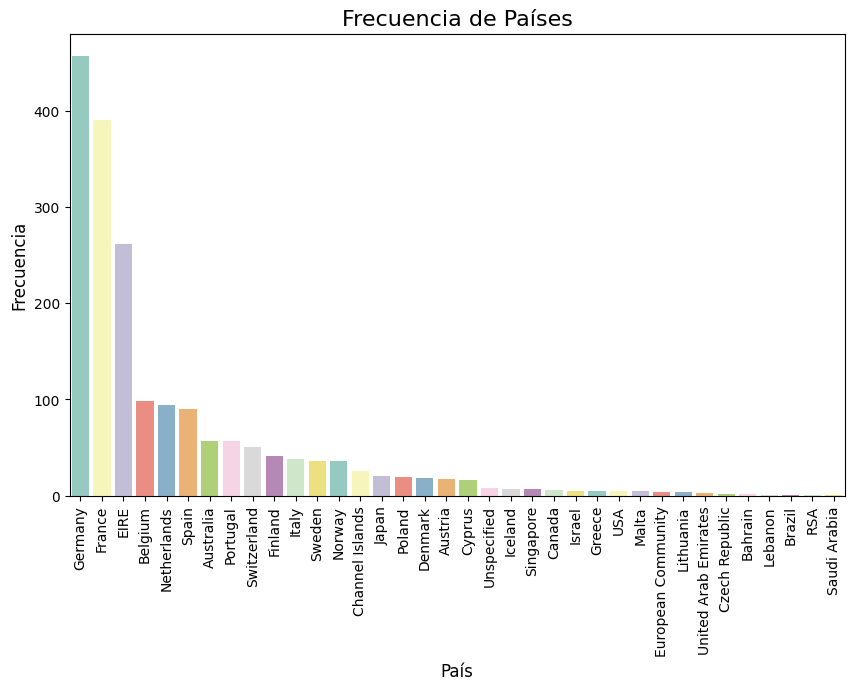

In [6]:
mtdataset_filtrado = mtdataset[mtdataset['País'] != 'United Kingdom']

plt.figure(figsize=(10, 6))
sns.countplot(x='País', data=mtdataset_filtrado, palette='Set3', order=mtdataset_filtrado['País'].value_counts().index)

# Títulos y etiquetas
plt.title('Frecuencia de Países', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [7]:
len(mtdataset_filtrado)

1889

In [8]:
len(mtdataset)-len(mtdataset_filtrado)

16673

In [9]:
mtdataset.columns

Index(['N° de factura', 'Fecha de factura', 'ID Cliente', 'País', 'Cantidad',
       'Monto'],
      dtype='object')

In [10]:
mtdataset_nodate=mtdataset[['N° de factura', 'ID Cliente', 'País', 'Cantidad',
       'Monto']]

In [11]:
monto_pais = mtdataset_nodate.groupby('País').sum()['Monto']
monto_pais.sort_values(ascending=False)

País
United Kingdom          7308391.55
Netherlands              285446.34
EIRE                     265545.90
Germany                  228867.14
France                   209024.05
Australia                138521.31
Spain                     61577.11
Switzerland               56443.95
Belgium                   41196.34
Sweden                    38378.33
Japan                     37416.37
Norway                    36165.44
Portugal                  33439.89
Finland                   22546.08
Singapore                 21279.29
Channel Islands           20450.44
Denmark                   18955.34
Italy                     17483.24
Cyprus                    13590.38
Austria                   10198.68
Poland                     7334.65
Israel                     7221.69
Greece                     4760.52
Iceland                    4310.00
Canada                     3666.38
USA                        3580.39
Malta                      2725.59
Unspecified                2667.07
United Arab Emi

In [12]:
monto_can = mtdataset_nodate.groupby('País').sum()['Cantidad']
monto_can.sort_values(ascending=False)

País
United Kingdom          4256915
Netherlands              200361
EIRE                     140525
Germany                  119263
France                   111472
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652
Eur

In [13]:
mtdataset_nodate['Porcentaje_Monto'] = mtdataset_nodate['Monto'] / mtdataset_nodate['Monto'].sum() * 100

In [14]:
mtdataset_nodate['Porcentaje_Cantidad'] = mtdataset_nodate['Cantidad'] / mtdataset_nodate['Cantidad'].sum() * 100

In [15]:
mtdataset_nodate

,N° de factura,ID Cliente,País,Cantidad,Monto,Porcentaje_Monto,Porcentaje_Cantidad
0,548370,15528.0,United Kingdom,123,229.33,0.002573,0.002380
1,575767,17348.0,United Kingdom,163,209.73,0.002354,0.003154
3,549106,17045.0,United Kingdom,1,39.95,0.000448,0.000019
4,573112,16416.0,United Kingdom,357,344.83,0.003870,0.006907
5,576630,13816.0,Germany,91,199.98,0.002244,0.001761
...,...,...,...,...,...,...,...
25945,579252,17450.0,United Kingdom,432,1034.40,0.011608,0.008358
25946,574908,16009.0,United Kingdom,28,82.76,0.000929,0.000542
25949,553060,15826.0,United Kingdom,488,720.00,0.008080,0.009442
25950,577049,17397.0,United Kingdom,104,298.78,0.003353,0.002012


In [16]:
monto_pais_por = mtdataset_nodate.groupby('País').sum()['Porcentaje_Monto']
monto_pais_por.sort_values(ascending=False)

País
United Kingdom          82.011638
Netherlands              3.203156
EIRE                     2.979842
Germany                  2.568249
France                   2.345578
Australia                1.554427
Spain                    0.690992
Switzerland              0.633390
Belgium                  0.462288
Sweden                   0.430665
Japan                    0.419870
Norway                   0.405833
Portugal                 0.375248
Finland                  0.253002
Singapore                0.238787
Channel Islands          0.229486
Denmark                  0.212709
Italy                    0.196189
Cyprus                   0.152505
Austria                  0.114445
Poland                   0.082306
Israel                   0.081039
Greece                   0.053421
Iceland                  0.048365
Canada                   0.041143
USA                      0.040178
Malta                    0.030585
Unspecified              0.029929
United Arab Emirates     0.021347
Lebanon  

In [17]:
cant_pais_por = mtdataset_nodate.groupby('País').sum()['Porcentaje_Cantidad']
cant_pais_por.sort_values(ascending=False)

País
United Kingdom          82.361674
Netherlands              3.876532
EIRE                     2.718841
Germany                  2.307469
France                   2.156731
Australia                1.629254
Sweden                   0.698124
Switzerland              0.582038
Spain                    0.540789
Japan                    0.503351
Belgium                  0.449583
Norway                   0.374147
Portugal                 0.311924
Finland                  0.207098
Channel Islands          0.183629
Denmark                  0.159329
Italy                    0.156949
Cyprus                   0.123071
Singapore                0.101401
Austria                  0.094436
Israel                   0.078281
Poland                   0.071277
Canada                   0.053458
USA                      0.047557
Iceland                  0.047557
Unspecified              0.034613
Greece                   0.030124
United Arab Emirates     0.018999
Malta                    0.018767
Czech Rep

In [18]:
mtdataset_num

,Cantidad,Monto
0,123,229.33
1,163,209.73
3,1,39.95
4,357,344.83
5,91,199.98
...,...,...
25945,432,1034.40
25946,28,82.76
25949,488,720.00
25950,104,298.78


In [19]:
range(len(mtdataset_num))

range(0, 18562)

In [20]:
len(mtdataset_num)

18562

In [21]:
l=['Monto','Cantidad']

In [22]:
range (len(l))

range(0, 2)

In [23]:
mtdataset[l]

,Monto,Cantidad
0,229.33,123
1,209.73,163
3,39.95,1
4,344.83,357
5,199.98,91
...,...,...
25945,1034.40,432
25946,82.76,28
25949,720.00,488
25950,298.78,104


C:\Users\andre\AppData\Local\Temp\ipykernel_18584\2173927775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = mtdataset[l[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
C:\Users\andre\AppData\Local\Temp\ipykernel_18584\2173927775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = mtdataset[l[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')


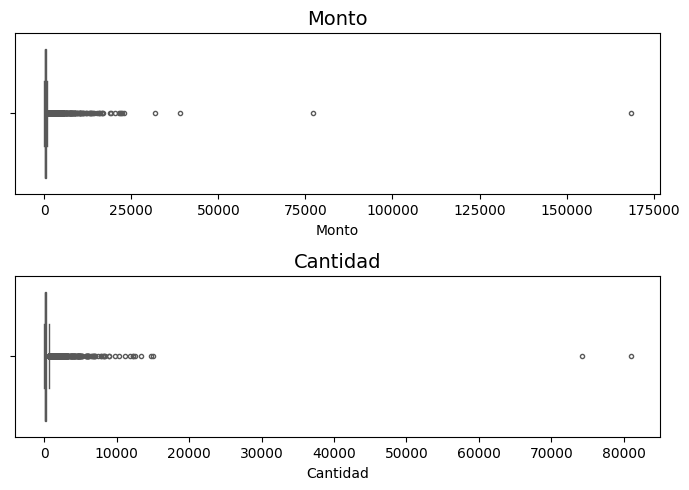

In [24]:
#Independizamos cada boxplot en su propia escala
plt.style.use('default')
plt.figure(figsize = (7,7))
for i in range (len(l)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(data = mtdataset[l[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
    plt.title(l[i], fontsize=14)
    plt.tight_layout()

In [25]:
range(3)

range(0, 3)

In [26]:
mtdataset_num.columns[i]

'Monto'

In [27]:
l[i]

'Cantidad'

C:\Users\andre\AppData\Local\Temp\ipykernel_18584\904107121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = mtdataset_num[mtdataset_num.columns[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
C:\Users\andre\AppData\Local\Temp\ipykernel_18584\904107121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = mtdataset_num[mtdataset_num.columns[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')


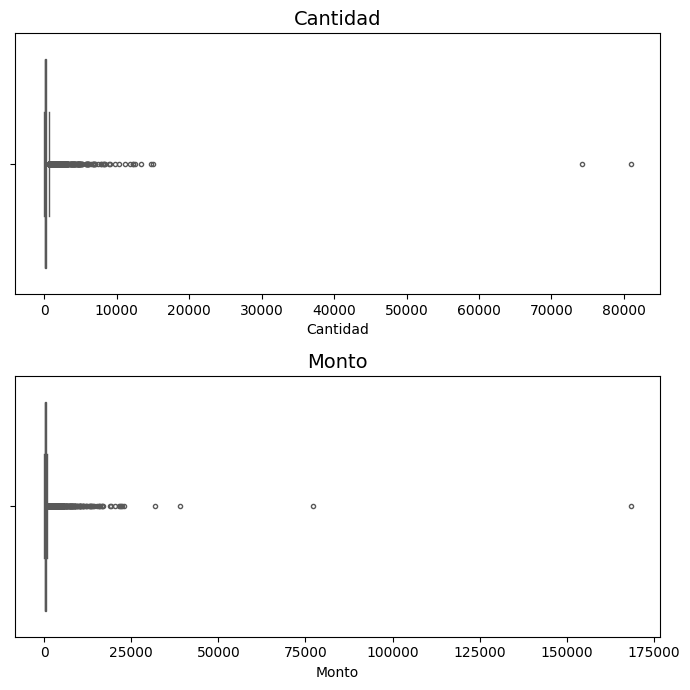

In [28]:
#Independizamos cada boxplot en su propia escala
plt.style.use('default')
plt.figure(figsize = (7,7))
for i in range(2):
    plt.subplot(2, 1, i+1)
    sns.boxplot(data = mtdataset_num[mtdataset_num.columns[i]], linewidth = 1,  palette="Set2", fliersize = 3, orient='h')
    plt.title(mtdataset_num.columns[i], fontsize=14)
    plt.tight_layout()

In [29]:
mtdataset_num[mtdataset_num["Cantidad"] == 0]

,Cantidad,Monto


In [30]:
mtdataset

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78


In [31]:
#Se resetea la base de datos ya que se eliminó others de gender
mtdataset=mtdataset.reset_index()
mtdataset

,index,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33
1,1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73
2,3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95
3,4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83
4,5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...,...
18557,25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40
18558,25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76
18559,25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00
18560,25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78


In [32]:
# Se reestablecen los indices ya que se eliminaron algunas variables.
mtdataset=mtdataset.drop("index",axis=1)
mtdataset

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73
2,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95
3,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83
4,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...
18557,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432,1034.40
18558,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28,82.76
18559,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00
18560,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78
